$\def \dot #1#2{\left\langle #1, #2 \right\rangle}$
$\def \adot #1#2{\left\langle #1, #2 \right\rangle}$
$\def \wt {\widetilde}$
$\def \cD {\mathcal{D}}$
$\def \cM {\mathcal{M}}$
$\def \cT {\mathcal{T}}$
$\def \bc {\mathbf{c}}$
$\def \bv {\mathbf{v}}$
$\def \bG {\mathbf{G}}$
$\newcommand{\rd}{\mathop{}\!\mathrm{d}}$

# Nonlinear state estimation

There are several connected issues here in particular:

1. How do we decide to partition the parameter space (or equivalently
the solution manifold)

2. How do we define the reduced basis spaces associated to each
cell of the partition.

We propose to proceed with two test cases, always for the PDE

$$- \nabla \cdot (a \nabla u)=1$$ 

on the unit cube $D=[0,1]^2$ with a depending on parameters.

We take the average diffusion $\bar a=1$, and fix some $\gamma=1-a_min<1$.


### TEST CASE 1

In this test, the partition witll be predefined naturally due
to the nature of the considered problem.

We take the above PDE and consider that there are 2 regimes:

- $a_1 (y) = 1 + \gamma \sum_{j=1}^4 y_j \chi_{D_j}$
- $a_2 (y) = 1+  \gamma \sum_{j=1}^4 y_j \chi_{E_j}$

where $\{D_1,..,D_4\}$ and $\{E_1,..,E_4\}$ are two different partitions
For example, we could obtain the first one by cutting $D$ at vertical line $x_1=1/3$ and horizontal line $x_2=1/3$ and the second one by cutting D at vertical line $x_1=2/3$ and horizontal line $x_2=2/3$

We avoid the cut at 1/2 since we saw that it leads to artificially low rank solution manifold.

Here we don’t take \gamma very close to 1, we could take
$\gamma=0.9$ for example.

Therefore the global familiy of solution $M$ is the union of two solution manifolds
$M=M_1 \cup M_2$
where $M_1$ is the manifold of all solutions $u_1(y)$ as $y\in [-1,1]^4$, associated to $a_1$ (first partion)
and $M_2$ is the same for $u_2(y)$.

Now  we fix m measurement functionals, for example $m=8$ which are local averages,
this fixes the space $W$.

Given an unknown $u \in M$ (in particular we do not know if it belongs to $M_1$ or $M_2$)
we want to recover it from its observation $w=P_W u$.

- The affine approach of the one space algorithm, would use a reduced basis for M which 
would typically be generated by a union of snapshots coming from $M=M_1 \cup M_2$
after we have subtracted some offset $\bar u$,  for example the average of the training set.
This results in affine spaces $V_n$ and we can select a good value of n by the ‘’poor man’s algorithm’’. 
Of course these spaces with n sufficiently large have high potential for approximation of
$M$ since there is enough snapshots to approximate both $M_1$ and $M_2$. Yet, we can expect
some bad artefact in this one space algorithm, since the true solution will be approximated 
by snapshots some of which from the wrong part of the manifold and thus associated
to the wrong partition of $D$

- As a nonlinear method, we generate affine reduced basis spaces $V_{n_1}$ specifically 
for $M_1$ and $V_{n_2}$ specifically for $M_2$ (now for each of them we need to use
snapshots after removing offsets $\bar u_1$ and $\bar u_2$ respectively).
Again we can pick the values $n_1$ and $n_2$ by using the poor man's algorithm.
Now we have two estimators by the afffine one space algorithm $u^*_1$ and $u^*_2$,
and we use the residual to both PDEs in order to decide which one is the final
estimator $u^*$. The question is thus whether if the procedure is able to well detect if
the true $u(y)$ is in $M_1$ or $M_2$. We can expect much better result than the one space 
affine approach.

### TEST CASE 2

In this test, the partition will have to be defined by a greedy algorithm.

We take the above PDE and consider now a fixed partition $D_1,\ldots,D_{16}$
say a uniform $4\times 4$ partition. Now we take

$$
a(y) = 1 + \gamma \sum_{j=1}^{16} y_j  j^{-s} \chi_{D_j}
$$

with gamma possibly very close to 1, for example 0.99 or 0.999
and s playing the role of making the problem anisotropic, for example
$s=2$ or $3$.

Then this means that we have problems only when the first variable y_1
goes to -1. So we expect that adaptive refinement of the parameter domain
should only be needed in the first coordinate $y_1$, at least for the first
steps of subdividing the domain. That makes the effect of such refinement 
much more effective than if we have to refine in many directions.

The people at College Station have tested this case for building piecewise 
polynomial in the y variable as nonlinear reduced models, and the results
were interesting.

Here you could first try the one space algorithm using a global reduced basis
(again after having substraced an offset ), which we expect not to perform
so well when \gamma gets very close to 1.

Then you could try to generate a partition of $K$ cells, by doing adaptive split 
only in the first direction $y_1$, which makes it simpler. And you could then
derive local reduced basis spaces associated to each cell and perform 
the nonlinear state estimation.

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Math, Latex

import sys
sys.path.append("../../")
import copy
import pyhilbert as hil
import pyredmod as rm

import os.path
from labellines import *
sns.set_style("whitegrid")
cp = sns.color_palette("bright", 11)

%matplotlib inline

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}

<IPython.core.display.Javascript object>

# Results of Test 1

The results are generated by the script ```scripts/05_1_two_space.py```, and the results stored are imported here, and plotted below

(3, 2, 8, 2000, 2) (3, 8) (3, 8) (3,)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Test set, source of $u$ for testing &$k$ &$\frac{{1}}{{N_{{\mathrm{te}}}}}  \sum_{{u \in \wt \cT_k}} \| u - u_k^*(w_i) \|_{{V}}$ &$\frac{{1}}{{N_{{\mathrm{te}}}}}  \sum_{{u \in \wt \cT_k}} \min_{{y}} \| A_k(y) u_k^*(P_W u) - f \|_{{V^*}}$ \\ 
$ \widetilde \cT_1$ &$1$ &5.062e-02 &2.342e-02 \\ 
$ \widetilde \cT_1$ &$2$ &9.818e-02 &2.965e-02 \\ 
$ \widetilde \cT_1$ &$0$ &6.047e-02 \\ 
$ \widetilde \cT_2$ &$1$ &9.922e-02 &3.622e-02 \\ 
$ \widetilde \cT_2$ &$2$ &4.856e-02 &2.779e-02 \\ 
$ \widetilde \cT_2$ &$0$ &6.661e-02 \\ 



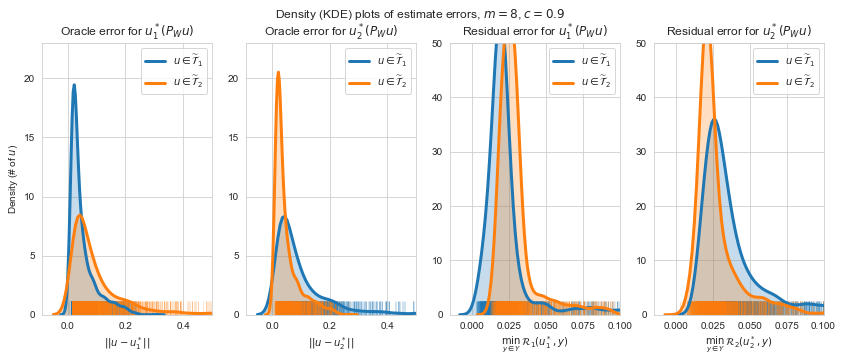

(3, 2, 8, 2000, 2) (3, 8) (3, 8) (3,)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Test set, source of $u$ for testing &$k$ &$\frac{{1}}{{N_{{\mathrm{te}}}}}  \sum_{{u \in \wt \cT_k}} \| u - u_k^*(w_i) \|_{{V}}$ &$\frac{{1}}{{N_{{\mathrm{te}}}}}  \sum_{{u \in \wt \cT_k}} \min_{{y}} \| A_k(y) u_k^*(P_W u) - f \|_{{V^*}}$ \\ 
$ \widetilde \cT_1$ &$1$ &1.761e-01 &5.489e-02 \\ 
$ \widetilde \cT_1$ &$2$ &2.840e-01 &5.811e-02 \\ 
$ \widetilde \cT_1$ &$0$ &1.645e-01 \\ 
$ \widetilde \cT_2$ &$1$ &2.776e-01 &6.748e-02 \\ 
$ \widetilde \cT_2$ &$2$ &1.625e-01 &5.293e-02 \\ 
$ \widetilde \cT_2$ &$0$ &1.563e-01 \\ 



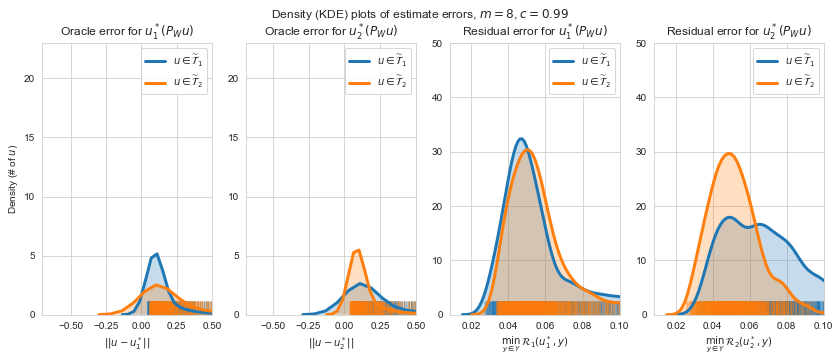

In [37]:
# A reminder of full_stats_load:
#
# full_stats_load[Vn, test_set (T_1 or T_2), n (dim of Vn), u in test_set, oracle error (0) or residual error (1)]
# full_stats_load[3, 2, Wm_dim, 2000, 2]
# NB Vn[0] = V_1, Vn[1] = V_2, Vn[2] = V_0
#
# poor_man_sels_load[Vn]
# poor_man_sels_load[3]
# inf_sups_load[Vn, n]
# inf_sups_load[3, Wm_dim]
# eps_load[Vn, n]
# eps_load[3, Wm_dim]

#ms = [4,8,16]
ms = [8]
gammas = [0.9, 0.99]
Vn_sym = '_Vn_sym'
Wm_sym = ''
label = 'non-symmetric'

for m in ms:
    for gamma in gammas:
        file_base = f'./scripts/results/05_1_two_space_{m}_{gamma}_5000_2000_affine{Wm_sym}{Vn_sym}'

        full_stats_load = np.load(file_base + '_results.npy')
        inf_sups_load = np.load(file_base + '_inf_sup.npy')
        eps_load = np.load(file_base + '_epsilons.npy')
        poor_man_sels_load = np.load(file_base + '_poor_mans_sel.npy')

        print(full_stats_load.shape, inf_sups_load.shape, eps_load.shape, poor_man_sels_load.shape)
        N_te = full_stats_load.shape[3]
        
        display(Latex(rf'Results for {m} measurements, $\gamma = {gamma}$. Inf-sup constant $\beta := \inf_{{v \in V}}\sup_{{w\in W}} \langle v, w \rangle / (\| v \| \| w \|)$'))
        inf_sups_loc = [inf_sups_load[i, poor_man_sels_load[i]] for i in range(inf_sups_load.shape[0])]
        eps_loc = [eps_load[i, poor_man_sels_load[i]] for i in range(eps_load.shape[0])]
        display(Latex(rf'Space $V_1$ ($n={poor_man_sels_load[0]+1}$) trained on $ \wt\cM_1$, $\mu =$ {1.0/inf_sups_loc[0]:0.3e}, $\varepsilon =$ {eps_loc[0]:0.3e}'))
        display(Latex(rf'Space $V_2$ ($n={poor_man_sels_load[1]+1}$) trained on $ \wt\cM_2$, $\mu =$ {1.0/inf_sups_loc[1]:0.3e}, $\varepsilon =$ {eps_loc[1]:0.3e}'))
        display(Latex(rf'Space $V_0$ ($n={poor_man_sels_load[2]+1}$) trained on $ \wt\cM$, $\mu =$ {1.0/inf_sups_loc[2]:0.3e}, $\varepsilon =$ {eps_loc[2]:0.3e}'))

        display(Latex(rf'How many times does $u_1^*$ perform better than $u_2^*$ on $ \wt \cT_1$: (Size of test set $N_{{\mathrm{{te}}}} = {full_stats_load.shape[4]}$)'))
        M_1_est_success_count = (full_stats_load[0, 0, poor_man_sels_load[0], :, 0] < full_stats_load[1, 0, poor_man_sels_load[1], :, 0]).sum()
        M_1_res_success_count = (full_stats_load[0, 0, poor_man_sels_load[0], :, 1] < full_stats_load[1, 0, poor_man_sels_load[1], :, 1]).sum()
        display(Latex(rf'$\#\big( u \in \wt \cT_1 : \| u - u^*_1(P_W u) \| < \| u - u^*_2(P_W u) \| \big)$ = {M_1_est_success_count}   ({100*M_1_est_success_count / N_te:0.1f}%)')) 
        display(Latex(rf'$\#\big( u \in \wt \cT_1 : \min_{{y \in Y}} \| A_1(y) u^*_1(P_W u) - f \|_{{V^*}} < \min_{{y \in Y}} \| A_2(y) u^*_2(P_W u) - f \|_{{V^*}}\big)$ = {M_1_res_success_count}  ({100*M_1_res_success_count / N_te:0.1f}%)'))

        display(Latex(rf'How many times does $u_2^*$ perform better than $u_1^*$ on $ \wt \cT_2$: (Size of test set $N_{{\mathrm{{te}}}} = {full_stats_load.shape[4]}$)'))
        M_2_est_success_count = (full_stats_load[0, 1, poor_man_sels_load[0], :, 0] > full_stats_load[1, 1, poor_man_sels_load[1], :, 0]).sum()
        M_2_res_success_count = (full_stats_load[0, 1, poor_man_sels_load[0], :, 1] > full_stats_load[1, 1, poor_man_sels_load[1], :, 1]).sum()
        display(Latex(rf'$\#\big( u \in \wt \cT_2 : \| u - u^*_1(P_W u_i) \| > \| u - u^*_2(P_W u) \| \big)$ = {M_2_est_success_count}  ({100*M_2_est_success_count / N_te:0.1f}%)'))
        display(Latex(rf'$\#\big( u \in \wt \cT_2 : \min_{{y \in Y}} \| A_1(y) u^*_1(P_W u) - f \|_{{V^*}} > \min_{{y \in Y}} \| A_2(y) u^*_2(P_W u) - f \|_{{V^*}}\big)$ = {M_2_res_success_count}  ({100*M_2_res_success_count / N_te:0.1f}%)'))

        data = [[r'Test set, source of $u$ for testing', r'$k$', 
                 r'$\frac{{1}}{{N_{{\mathrm{te}}}}}  \sum_{{u \in \wt \cT_k}} \| u - u_k^*(w_i) \|_{{V}}$',
                 r'$\frac{{1}}{{N_{{\mathrm{te}}}}}  \sum_{{u \in \wt \cT_k}} \min_{{y}} \| A_k(y) u_k^*(P_W u) - f \|_{{V^*}}$']]
        for i, test_set in enumerate(['$ \widetilde \cT_1$', '$ \widetilde \cT_2$']):
            for j, train_set in enumerate([r'$1$', r'$2$', r'$0$']):
                data.append([test_set])
                data[-1].append(train_set)
                data[-1].append(f'{full_stats_load[j, i, poor_man_sels_load[j], :, 0].mean():0.3e}')
                if j < 2:
                    data[-1].append(f'{full_stats_load[j, i, poor_man_sels_load[j], :, 1].mean():0.3e}')

        display(HTML(
           '<table width=100%><tr>{}</tr></table>'.format(
               '</tr><tr>'.join(
                   '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data))))
        print('{}'.format(
               ''.join(
                   '{} \\\\ \n'.format(' &'.join(str(_) for _ in row)) for row in data)))

        fig, axs = plt.subplots(1, 4, figsize=(14,5))
        #fig.suptitle('Density (KDE) plots of estimate errors', fontsize=12)
        rug_alpha = 0.2
        x_lims = [[None, 0.5], [None, 0.1]]
        y_lims = [[None, 23], [None, 50]]
        fig.suptitle(rf'Density (KDE) plots of estimate errors, $m = {m}$, $c = {gamma}$', fontsize=12)
        for i in range(2):
            for j in range(2):
                result_labels = [rf'Oracle error for $u_{j+1}^*(P_W u)$', 
                                 rf'Residual error for $u_{j+1}^*(P_W u)$']
                x_labels = [rf'$|| u - u_{j+1}^* ||$', rf'$\min_{{y\in Y}} \, \mathcal{{R}}_{j+1} (u_{j+1}^*, y)$']
                                 #f'Density (KDE) plot of $\min_{{y}} \, || A_{j+1}(y) u_{j+1}^*(P_W u) - f ||_{{V^*}}$']
                ax = axs[i*2 + j]
                plt.sca(ax)
                sns.distplot(full_stats_load[0, j, poor_man_sels_load[0], :, i], hist = False, kde = True, rug = True,
                             label = rf'$u \in \widetilde \mathcal{{T}}_{1}$', kde_kws = {'shade': True, 'linewidth': 3}, rug_kws={"alpha":rug_alpha})
                sns.distplot(full_stats_load[1, j, poor_man_sels_load[0], :, i], hist = False, kde = True,rug = True,
                             label = rf'$u \in \widetilde \mathcal{{T}}_{2}$', kde_kws = {'shade': True, 'linewidth': 3}, rug_kws={"alpha":rug_alpha})
                if i == 0 and j == 0:
                    ax.set_ylabel(rf'Density (# of $u$)')
                ax.set_xlabel(x_labels[i])
                ax.set_xlim(x_lims[i])
                ax.set_ylim(y_lims[i])
                ax.set_title(result_labels[i])


        fig.savefig(f'figs/05_test_1_err_densities_{m}_{gamma}.pdf', bbox_inches = 'tight', pad_inches = 0)
        fig.savefig(f'figs/05_test_1_err_densities_{m}_{gamma}.png', bbox_inches = 'tight', pad_inches = 0)
        plt.show()

# Test 1 further results

Below we plot the quantities associated with the inf-sup constant, that is used to select the dimension of the reduced basis $V_n$. 

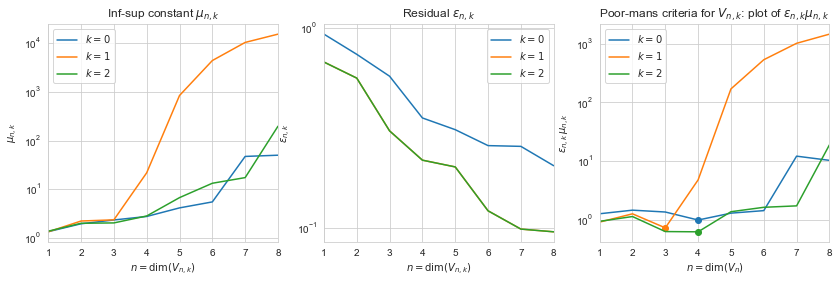

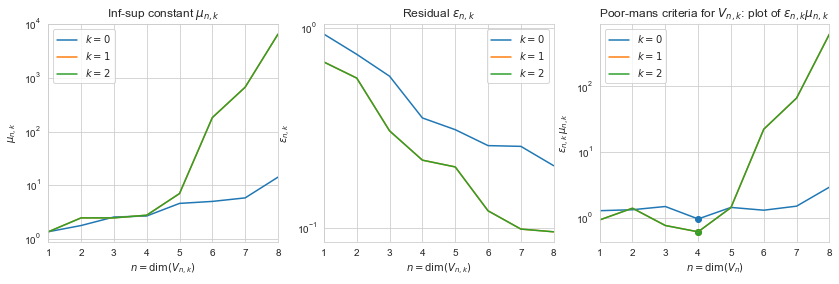

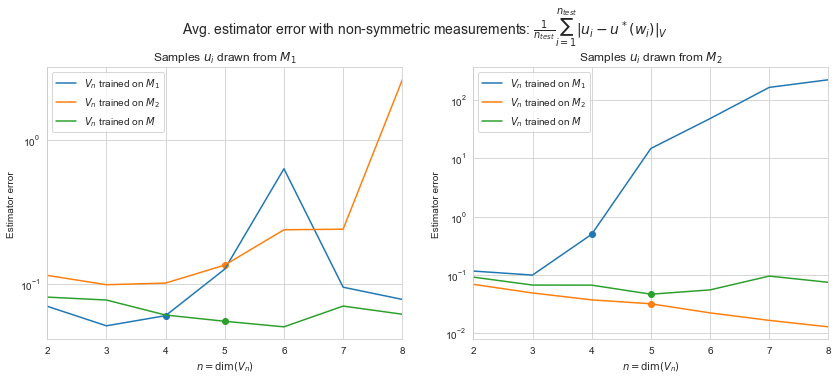

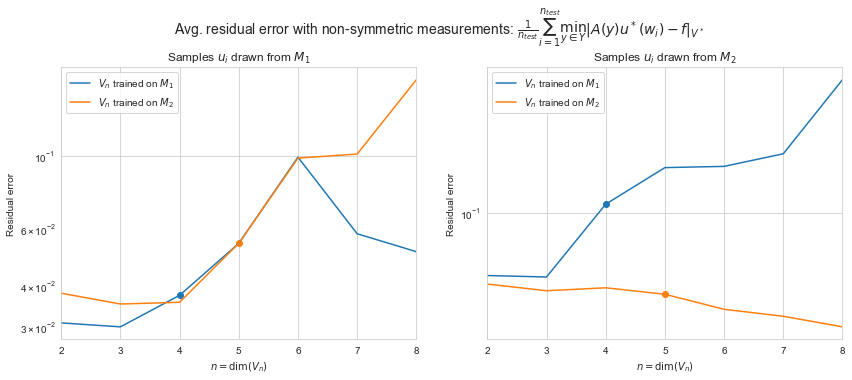

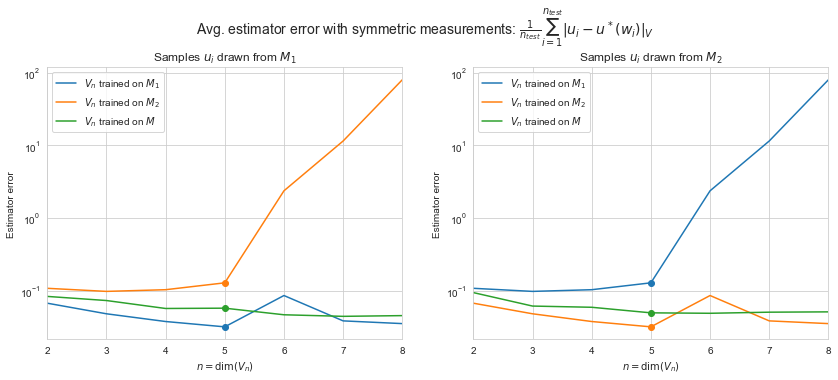

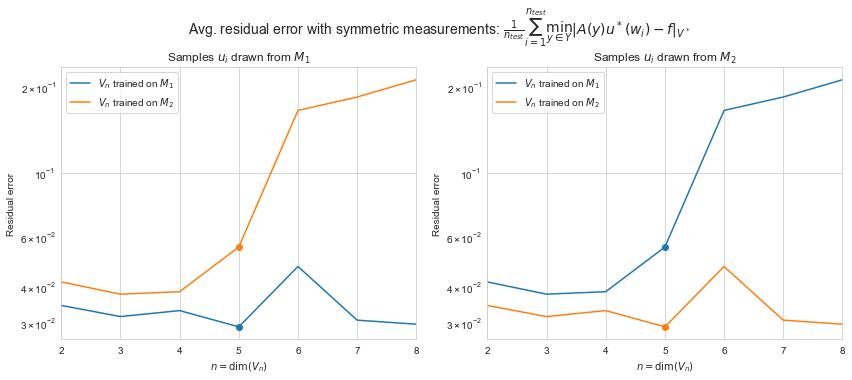

In [110]:
poor_man_sels = np.zeros((2,3), dtype=int)
m = 8

for i, sym_label in enumerate([r'non-symmetric', r'symmetric']):
    fig, axs = plt.subplots(1, 3, figsize=(14,4))
    axs[0].set_title(rf'Inf-sup constant $\mu_{{n, k}}$')
    axs[1].set_title(rf'Residual $\epsilon_{{n,k}}$')
    for Vn_label, j in enumerate([2,0,1]):
        axs[0].semilogy(range(1,m+1), 1.0/inf_sups_load[i,j,:], label=f'$k = {Vn_label}$')
        axs[0].set_xlabel(r'$n = \mathrm{dim}(V_{{n,k}})$')
        axs[0].set_ylabel(r'$\mu_{{n,k}}$')
        axs[1].semilogy(range(1,m+1), eps_load[i, j, :], label=f'$k = {Vn_label}$')
        axs[1].set_xlabel(r'$n = \mathrm{dim}(V_{{n,k}})$')
        axs[1].set_ylabel(r'$\epsilon_{{n,k}}$')
    axs[0].set_xlim([1,8])
    ax.set_xticks(range(1,9))
    axs[0].legend()
    axs[1].set_xlim([1,8])
    ax.set_xticks(range(1,9))
    axs[1].legend() 

    ax = axs[2]
    ax.set_title(rf'Poor-mans criteria for $V_{{n, k}}$: plot of $\epsilon_{{n,k}} \mu_{{n,k}}$')
    for Vn_label, j in enumerate([2,0,1]):
        inf = inf_sups_load[i, j, :]; eps = eps_load[i, j, :]
        ax.semilogy(range(1,m+1), eps/inf, label=f'$k = {Vn_label}$')
        poor_man_sel = poor_man_sels_load[i,j]
        ax.scatter(poor_man_sel+1, eps[poor_man_sel]/inf[poor_man_sel])
        ax.set_xlabel(r'$n = \mathrm{dim}(V_n)$')
        ax.set_ylabel(r'$\epsilon_{{n,k}} \, \mu_{{n,k}}$')
    ax.legend()
    ax.set_xlim([1,8])
    
    plt.savefig(f'figs/05_{sym_label}_mu_eps_poor_mans.pdf', bbox_inches='tight')
    plt.show()

    
    
# Some error plots across different dimensionalities
for l, sym_label in enumerate([r'non-symmetric', r'symmetric']):
    for k, plot_title in enumerate([rf'Avg. estimator error with {sym_label} measurements: $\frac{{1}}{{n_{{test}}}} \sum_{{i=1}}^{{n_{{test}}}} \| u_{{i}} - u^*(w_{{i}}) \|_{{V}}$',
                                    rf'Avg. residual error with {sym_label} measurements: $\frac{{1}}{{n_{{test}}}} \sum_{{i=1}}^{{n_{{test}}}} \min_{{y \in Y}} \| A(y) u^*(w_{{i}}) - f \|_{{V^*}}$']):
        fig = plt.figure(figsize=(14,5))
        fig.suptitle(plot_title, y=1.05, fontsize=14)

        for i, test_label in enumerate([r'$M_1$', r'$M_2$']):
            ax = fig.add_subplot(1, 2, i+1)
            ax.set_title(rf'Samples $u_i$ drawn from {test_label}')
            for j, Vn_label in enumerate([r'$M_1$', r'$M_2$', r'$M$']):
                poor_man_sel = poor_man_sels_load[l,j]
                if k == 0:
                    ax.semilogy(range(2,m+1), full_stats_load[l, j, i, 1:, :, 0].mean(axis=1), label=f'$V_n$ trained on {Vn_label}')
                    ax.scatter(poor_man_sel+2, full_stats_load[l, j, i, poor_man_sel+1, :, 0].mean())
                    ax.set_xlim([2,m])
                    ax.set_ylabel(r'Estimator error')
                else:
                    if j < 2:
                        ax.semilogy(range(2,m+1), full_stats_load[l, j, i, 1:, :, 1].mean(axis=1), label=f'$V_n$ trained on {Vn_label}')
                        ax.scatter(poor_man_sel+2, full_stats_load[l, j, i, poor_man_sel+1, :, 1].mean())
                    ax.set_ylabel(r'Residual error')
                    ax.set_xlim([2,m])
                ax.set_xlabel(r'$n = \mathrm{dim}(V_n)$')
                    
            ax.legend()    
        if k==0:
            fig.savefig(f'figs/05_{sym_label}_est_err.pdf', bbox_inches='tight')
        else:
            fig.savefig(f'figs/05_{sym_label}_resid_err.pdf', bbox_inches='tight')
        plt.show()

# Test 1 addendum: reduced basis selection through residual

So far all tests are for fixed reduced basis, computing all of $u^*_0$,  $u^*_1$, and  $u^*_2$, then comparing error results. Here instead we look at model selection through 

$$ \Large
k^* = {\arg\min}_{k=1,2} \min_{y\in Y} \| A_k(y) u^*_{k} (w) - f \|_{V^*}
$$

We compare this to the oracle selection where we choose

$$ \Large
k^* = {\arg\min}_{k=1,2} \| u^*_{k} (w) - u \|_{V}
$$

for which we require knowledge of the true solution $u$, which in practice we don't necessarily have.

From test set 1
          Mean        Max
oracle:  5.057e-02    2.786e-01
resid:   6.585e-02    6.467e-01
affine:  6.047e-02    4.203e-01
From test set 2
          Mean        Max
oracle:  4.855e-02    2.641e-01
resid:   5.201e-02    2.660e-01
affine:  6.661e-02    4.319e-01


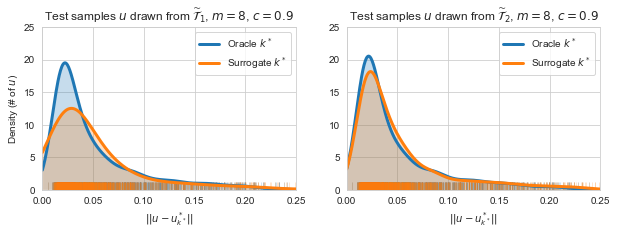

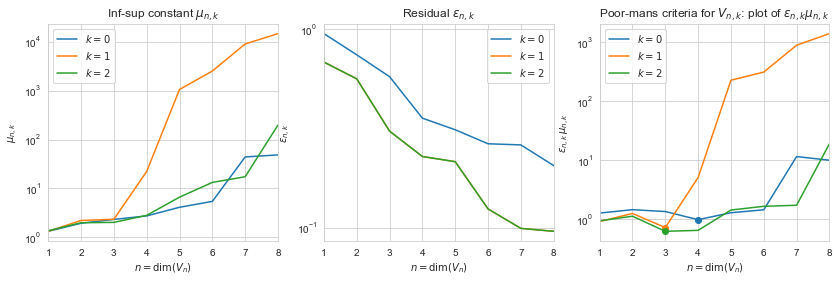

From test set 1
          Mean        Max
oracle:  1.723e-01    3.430e+00
resid:   1.757e-01    3.742e+00
affine:  1.645e-01    3.302e+00
From test set 2
          Mean        Max
oracle:  1.619e-01    3.207e+00
resid:   1.649e-01    3.207e+00
affine:  1.563e-01    3.030e+00


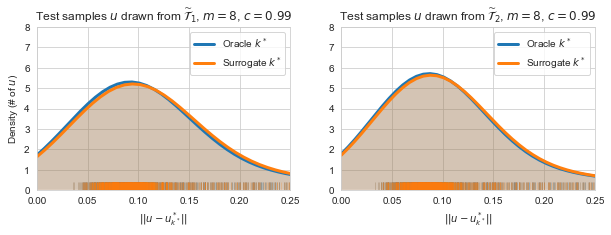

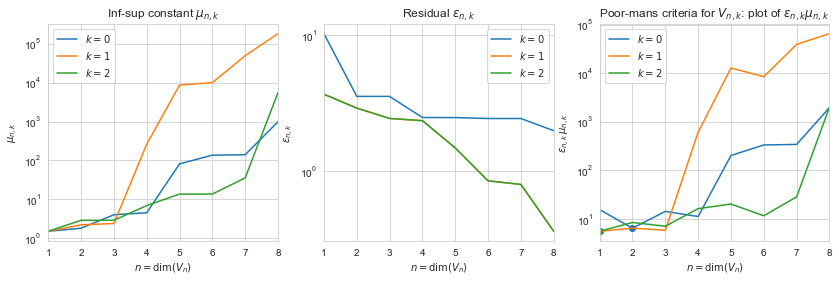

In [42]:
# A reminder of full_stats_load:
#
# full_stats_load[Vn, test_set (T_1 or T_2), n (dim of Vn), u in test_set, oracle error (0) or residual error (1)]
# full_stats_load[3, 2, Wm_dim, 2000, 2]
# NB Vn[0] = V_1, Vn[1] = V_2, Vn[2] = V_0
#
# poor_man_sels_load[Vn]
# poor_man_sels_load[3]
# inf_sups_load[Vn, n]
# inf_sups_load[3, Wm_dim]
# eps_load[Vn, n]
# eps_load[3, Wm_dim]

#Wm_dims = [4, 8, 16]
Wm_dims = [8]
gammas = [0.9, 0.99]

for Wm_dim in Wm_dims:
    for g_i, gamma in enumerate(gammas):
        file_base = f'./scripts/results/05_1_two_space_{Wm_dim}_{gamma}_5000_2000_affine_Vn_sym'

        full_stats_load = np.load(file_base + '_results.npy')
        inf_sups_load = np.load(file_base + '_inf_sup.npy')
        eps_load = np.load(file_base + '_epsilons.npy')
        poor_man_sels_load = np.load(file_base + '_poor_mans_sel.npy')

        poor_mans_error = np.zeros(full_stats_load.shape[:2] + full_stats_load.shape[3:])
        
        for i in range(full_stats_load.shape[0]):
            poor_mans_error[i,:,:,:] = full_stats_load[i, :, poor_man_sels_load[i], :, :]

        oracle_choice = np.zeros(poor_mans_error.shape[1:3], dtype=np.int)
        resid_choice = np.zeros(poor_mans_error.shape[1:3], dtype=np.int)
        oracle_choice_error = np.zeros(poor_mans_error.shape[1:3])
        resid_choice_error = np.zeros(poor_mans_error.shape[1:3])
        for i in range(poor_mans_error.shape[1]):
            oracle_choice[i] = np.argmin(poor_mans_error[:2, i, :, 0], axis=0)
            resid_choice[i] = np.argmin(poor_mans_error[:2, i, :, 1], axis=0)

            for j in range(poor_mans_error.shape[2]):
                oracle_choice_error[i, j] = poor_mans_error[oracle_choice[i, j], i, j, 0]
                resid_choice_error[i, j] = poor_mans_error[resid_choice[i, j], i, j, 0]
            print(f'From test set {i+1}')
            print('          Mean        Max')
            print(f'oracle:  {oracle_choice_error[i].mean():0.3e}    {oracle_choice_error[i].max():0.3e}')
            print(f'resid:   {resid_choice_error[i].mean():0.3e}    {resid_choice_error[i].max():0.3e}')
            print(f'affine:  {poor_mans_error[2, i, :, 0].mean(axis=0):0.3e}    {poor_mans_error[2, i, :, 0].max(axis=0):0.3e}')
            
        fig, axs = plt.subplots(1, 2, figsize=(10,3))
        #fig.suptitle('Density (KDE) plots of estimate errors', fontsize=12)
        rug_alpha = 0.2
        x_lims = [0., 0.25]
        y_lims = [[None, 25], [None, 8]]

        for i, test_label in enumerate([r'$\widetilde\mathcal{T}_1$', r'$\widetilde\mathcal{T}_2$']):
            result_labels = [rf'Oracle error for $u_{j+1}^*(P_W u)$', 
                             rf'Residual error for $u_{j+1}^*(P_W u)$']
            ax = axs[i]
            plt.sca(ax)
            sns.distplot(oracle_choice_error[i, :], hist = False, kde = True, rug = True, 
                         label = rf'Oracle $k^*$', kde_kws = {'shade': True, 'linewidth': 3, 'clip': (0.0, np.inf), 'gridsize': 500}, rug_kws={"alpha":rug_alpha})
            sns.distplot(resid_choice_error[i, :] , hist = False, kde = True,rug = True, 
                         label = rf'Surrogate $k^*$', kde_kws = {'shade': True, 'linewidth': 3, 'clip': (0.0, np.inf), 'gridsize': 500}, rug_kws={"alpha":rug_alpha})
            #sns.distplot(poor_mans_error[2, i, :, 0] , hist = False, kde = True,rug = True, 
            #             label = rf'$u^*_0$', kde_kws = {'shade': True, 'linewidth': 3, 'clip': (0.0, np.inf), 'gridsize': 500}, rug_kws={"alpha":rug_alpha})
            if i == 0:
                ax.set_ylabel(rf'Density (# of $u$)')
            ax.set_xlabel(r'$|| u - u_{k^*}^* ||$')
            ax.set_xlim(x_lims)
            ax.set_ylim(y_lims[g_i])
            ax.set_title(rf'Test samples $u$ drawn from {test_label}, $m={Wm_dim}$, $c = {gamma}$')
            
        plt.savefig(f'figs/05_1_{Wm_dim}_{gamma}_err_densities.pdf', bbox_inches='tight')
        plt.show()
        
        fig, axs = plt.subplots(1, 3, figsize=(14,4))
        axs[0].set_title(rf'Inf-sup constant $\mu_{{n, k}}$')
        axs[1].set_title(rf'Residual $\epsilon_{{n,k}}$')
        axs[2].set_title(rf'Poor-mans criteria for $V_{{n, k}}$: plot of $\epsilon_{{n,k}} \mu_{{n,k}}$')
        for Vn_label, j in enumerate([2,0,1]):

            axs[0].semilogy(range(1,Wm_dim+1), 1.0/inf_sups_load[j,:], label=f'$k = {Vn_label}$')
            axs[0].set_ylabel(r'$\mu_{{n,k}}$')

            axs[1].semilogy(range(1,Wm_dim+1), eps_load[j, :], label=f'$k = {Vn_label}$')
            axs[1].set_ylabel(r'$\epsilon_{{n,k}}$')

            axs[2].semilogy(range(1,Wm_dim+1), eps_load[j, :]/inf_sups_load[j,:], label=f'$k = {Vn_label}$')
            poor_man_sel = poor_man_sels_load[j]
            axs[2].scatter(poor_man_sel+1, eps_load[j, poor_man_sel]/inf_sups_load[j, poor_man_sel])
            axs[2].set_ylabel(r'$\epsilon_{{n,k}} \, \mu_{{n,k}}$')

        for ax in axs:
            ax.set_xlabel(r'$n = \mathrm{dim}(V_n)$')
            ax.set_xlim([1,Wm_dim])
            ax.set_xticks(range(1,Wm_dim+1))
            ax.legend()

        plt.savefig(f'figs/05_1_{Wm_dim}_{gamma}_est_err_bounds.pdf', bbox_inches='tight')
        plt.show()

# Test 1 addendum: reduced basis dimension selection through residual

Here, rather than fixing $n = \mathrm{dim}(V_n)$ through the poor mans method, we look instead at variable $n$. Some notation - we denote the optimal reconstruction from space $M_k$ (where $k=1$ or $2$) of dimension $n$ by $\Large u^*_{k, n} (w)$.

Now, for any measurement $w$, we define the residual-optimal dimension of the reduced basis to be

$$ \Large
\tilde n(w) = {\arg\min}_{n=1...m} \min_{y\in Y} \| A_k(y) u^*_{k,n} (w) - f \|_{V^*}
$$

and then we take the _residual selected_ optimal reconstruction to be

$$ \Large
\tilde u^*_k (w) := u^*_{k, \tilde n(w)} (w)
$$

Fortunately all the required results to inspect the performance of this algorithm have already been calculated by the script ```scripts/05_1_two_space.py```. We just do some processing of these results here. What we're after is

- A histogram of what dimensions are chosen
- Comparison between the residual selection and the poor-man's selection
- A plot of the average estimator error over $n$.
- Comparisons as above between $u^*_1$ and $u^*_2$ for test points from $M_1$ and $M_2$
- Compare the residual selection with the best selection (given oracle information about the true solution)

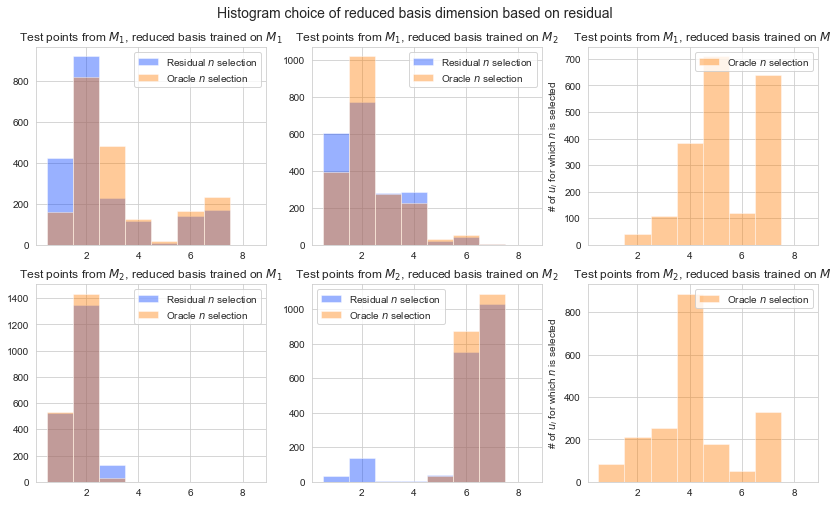

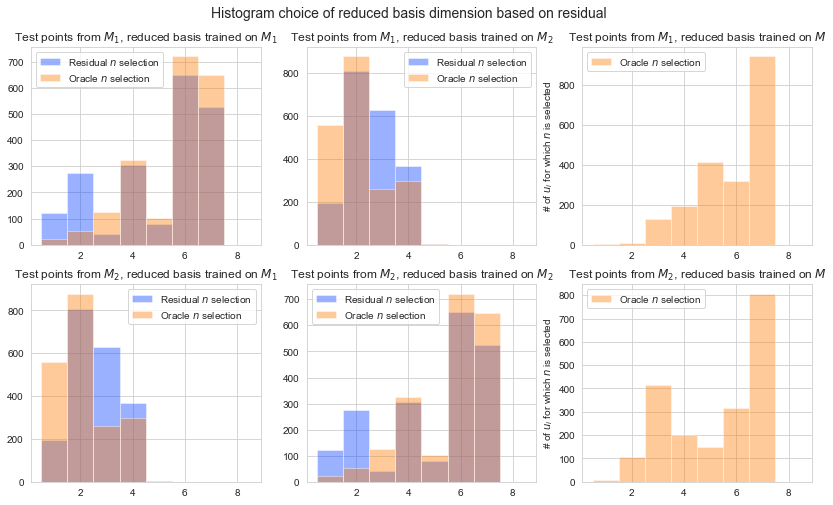

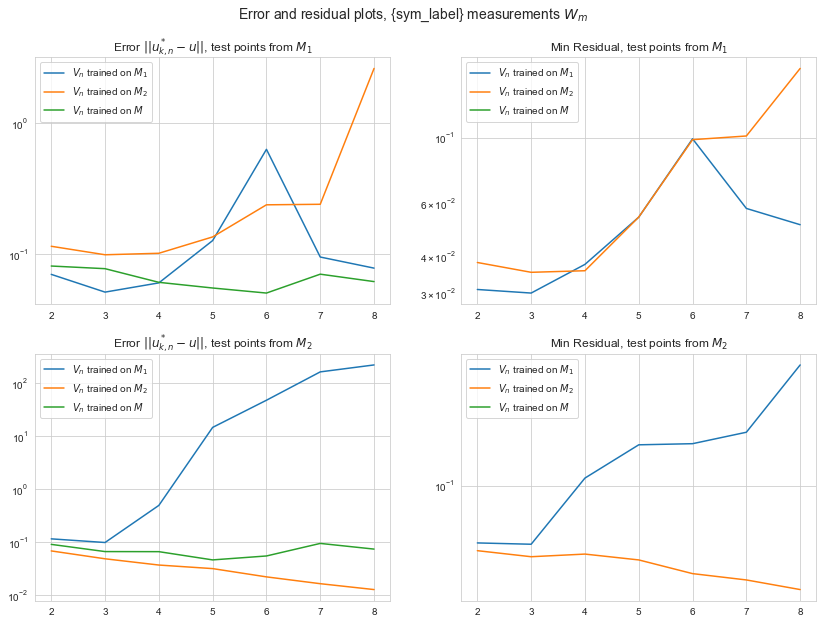

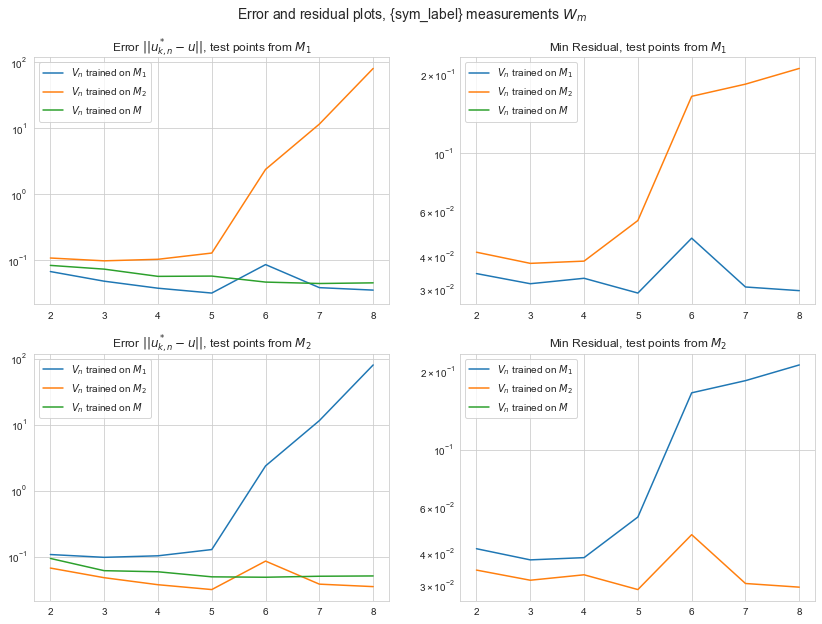

In [6]:
# full_stats_load[Wm_sym, training_set, test_set, n, test_idx, stat_est_or_res]

resid_n_tilde = full_stats_load[:, :, :, 1:, :, 1].argmin(axis=3) + 1
oracle_n_tilde = full_stats_load[:, :, :, 1:, :, 0].argmin(axis=3) + 1

# Plot
for i, sym_label in enumerate([r'non-symmetric', r'symmetric']):
        fig = plt.figure(figsize=(14,8))
        fig.suptitle('Histogram choice of reduced basis dimension based on residual', y=0.95, fontsize=14)
        for j, test_label in enumerate([r'$M_1$', r'$M_2$']):
            for k, Vn_label in enumerate([r'$M_1$', r'$M_2$', r'$M$']):
                ax = fig.add_subplot(2, 3, j*3+k+1)
                ax.set_title(rf'Test points from {test_label}, reduced basis trained on {Vn_label}')
                if k < 2:
                    sns.distplot(resid_n_tilde[i, k, j, :], label = 'Residual $n$ selection', bins=np.arange(0.5,m+1.5), kde=False, color=cp[0])
                sns.distplot(oracle_n_tilde[i, k, j, :], label = 'Oracle $n$ selection', bins=np.arange(0.5,m+1.5), kde=False, color=cp[1])
                ax.legend()
            ax.set_ylabel(rf'# of $u_i$ for which $n$ is selected')
plt.show()


for i, sym_label in enumerate([r'non-symmetric', r'symmetric']):
    fig, axs = plt.subplots(2, 2, figsize=(14,10))
    fig.suptitle('Error and residual plots, {sym_label} measurements $W_m$', y=0.95, fontsize=14)
    for j, test_label in enumerate([r'$M_1$', r'$M_2$']):
        for k, Vn_label in enumerate([r'$M_1$', r'$M_2$', r'$M$']):
            axs[j, 0].set_title(rf'Error $|| u^*_{{k,n}} - u||$, test points from {test_label}')
            axs[j, 0].semilogy(range(2,m+1), full_stats_load[i, k, j, 1:, :, 0].mean(axis=-1), label=f'$V_n$ trained on {Vn_label}')
            axs[j, 0]
            axs[j, 0].legend()
            axs[j, 1].set_title(rf'Min Residual, test points from {test_label}')
            axs[j, 1].semilogy(range(2,m+1), full_stats_load[i, k, j, 1:, :, 1].mean(axis=-1), label=f'$V_n$ trained on {Vn_label}')
            axs[j, 1].legend()
    plt.show()


# Test 2 results

The results are generated by the script ```scripts/05_2_greedy_partition.py```, and the results stored are imported here.

# Test 1 code

This code is largely copied in the script ```scripts/05_1_two_space.py``` associated with this workbook. Kept here for potential future use and examination.

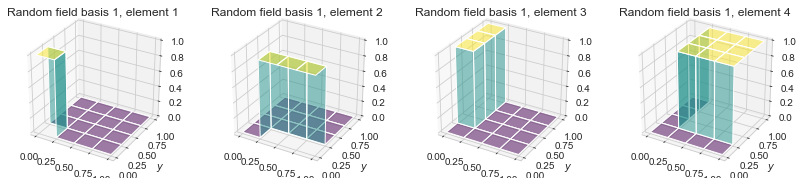

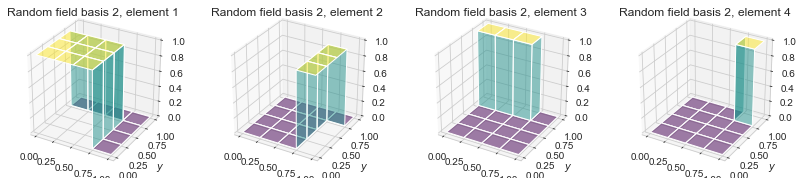

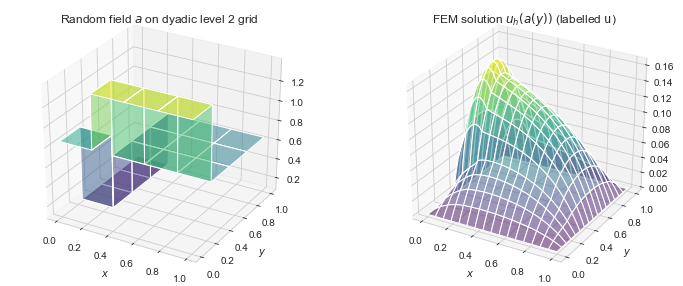

In [5]:
def make_soln(points, field_basis, fem_space, a_bar=1.0, c=0.5, f=1.0, verbose=False):
    
    solns = hil.Basis(np.zeros((H1_fine.n, len(points))), space=H1_fine)
    fields = []
    
    for i, p in enumerate(np.atleast_2d(points)):
        field = c * (field_basis @ p) + a_bar
        fields.append(field)
        # Then the fem solver (there a faster way to do this all at once? This will be huge...
        fem_solver = hil.DyadicFEMSolver(fem_space = fem_space, rand_field = field, f = 1)
        fem_solver.solve()
        solns._values[:,i] = fem_solver.u.values
        
    return solns, fields

fem_div = 7
H1_fine = hil.H1DyadicSq(fem_div)
field_div = 2
L2_coarse = hil.L2DyadicSq(field_div)
a_bar = 1.0
c = 0.9
side_n = 2**field_div
d = 4
y_range = np.zeros((d,2))
y_range[:,0] = -1.0
y_range[:,1] = 1.0

field_basis_1 = hil.Basis(values=np.array([np.pad(e.reshape((2,2)), ((0,2),(0,2)), mode='edge').flatten() for e in np.eye(4)]).T, space=L2_coarse)
field_basis_2 = hil.Basis(values=np.array([np.pad(e.reshape((2,2)), ((2,0),(2,0)), mode='edge').flatten() for e in np.eye(4)]).T, space=L2_coarse)

fig = plt.figure(figsize=(14, 3))
for i, e in enumerate(field_basis_1):
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    e.plot(ax, title=f'Random field basis 1, element {i+1}')
plt.show()
fig = plt.figure(figsize=(14, 3))
for i, e in enumerate(field_basis_2):
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    e.plot(ax, title=f'Random field basis 2, element {i+1}')
plt.show()

def diffusion_pde_1(points):
    solns, fields = make_soln(points, field_basis=field_basis_1, fem_space=H1_fine, a_bar=a_bar, c=c)
    return solns
def diffusion_pde_2(points):
    solns, fields = make_soln(points, field_basis=field_basis_2, fem_space=H1_fine, a_bar=a_bar, c=c)
    return solns

np.random.seed(1)
y = np.random.random((1,d)) * (y_range[:, 1] - y_range[:, 0]) + y_range[:, 0]
u, a = make_soln(y, field_basis=field_basis_1, fem_space=H1_fine, a_bar=a_bar, c=c)
u = u[0]; a = a[0]

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
a.plot(ax, title='Random field $a$ on dyadic level 2 grid')
ax = fig.add_subplot(1, 2, 2, projection='3d')
u.plot(ax, title='FEM solution $u_h(a(y))$ (labelled $\mathtt{u}$)')
plt.show()

In [6]:
N_tr = 2000
N_te = 1000

np.random.seed(1)

points_trs = []; points_tes = []
us_trs = []; us_tes = []

for pde in [diffusion_pde_1, diffusion_pde_2]:    
    points_trs.append(np.random.random((N_tr, d)) * (y_range[:, 1] - y_range[:, 0]) + y_range[:, 0])
    us_trs.append(pde(points_trs[-1]))
    points_tes.append(np.random.random((N_te, d)) * (y_range[:, 1] - y_range[:, 0]) + y_range[:, 0])
    us_tes.append(pde(points_tes[-1]))

#points_trs.append(np.random.random((N_tr, d)) * (y_range[:, 1] - y_range[:, 0]) + y_range[:, 0])
#us_trs.append(diffusion_pde_1(points_trs[-1]))
#points_trs.append(points_trs[-1][:,::-1])]
#us_trs.append(diffusion_pde_2(points_trs[-1]))
#points_tes.append(np.random.random((N_te, d)) * (y_range[:, 1] - y_range[:, 0]) + y_range[:, 0])
#us_tes.append(diffusion_pde_1(points_tes[-1]))
#points_tes.append(points_tes[-1][:,::-1])
#us_tes.append(diffusion_pde_2(points_tes[-1]))

us_trs.append(copy.deepcopy(us_trs[0]).append(copy.deepcopy(us_trs[1])))

y_guessers = [hil.DyadicGuesser(field_mean=a_bar, field_mult=c, fem_space=H1_fine, field_space=L2_coarse, field_basis=field_basis, y_bounds=y_range) for field_basis in [field_basis_1, field_basis_2]]

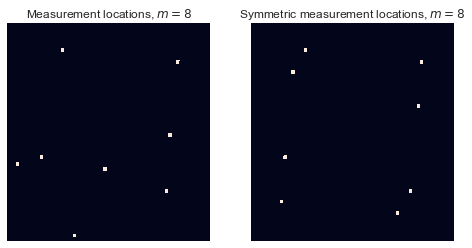

i 	 Selection 	 Sel. criteria
1 : 	 110 	 1.282277434807788
2 : 	 1576 		 0.6840319995487794
3 : 	 30 		 0.535492165286112
4 : 	 455 		 0.2521595891580887
5 : 	 62 		 0.21813198168002332
6 : 	 169 		 0.18731176196934807
7 : 	 647 		 0.10179255224959809
8 : 	 893 		 0.09347063082111559
9 : 	 1052 		 0.07929505456859194
Done!
i 	 Selection 	 Sel. criteria
1 : 	 1313 	 1.2382441867203204
2 : 	 527 		 0.7716609320198367
3 : 	 1530 		 0.5568547341682185
4 : 	 1026 		 0.3033935194840333
5 : 	 1343 		 0.18935007384978148
6 : 	 1419 		 0.1478409472329698
7 : 	 1709 		 0.13126972744231316
8 : 	 1265 		 0.09222475117508885
9 : 	 359 		 0.07275126115255447
Done!
i 	 Selection 	 Sel. criteria
1 : 	 110 	 1.2822774348077874
2 : 	 3313 		 1.0637851691218432
3 : 	 2527 		 0.668736227382874
4 : 	 1576 		 0.5942477716022778
5 : 	 3530 		 0.40806440613682515
6 : 	 1052 		 0.2853496199203813
7 : 	 2327 		 0.24518348385045988
8 : 	 893 		 0.22983527034678478
9 : 	 169 		 0.200919095993847
Done!


In [7]:
# local_width is the width of the measurement squares in terms of FEM mesh squares
width_div = 2
spacing_div = 5
L2_loc = hil.L2DyadicSq(fem_div)

Wm_reg, Wm_reg_L2, Wloc_reg = rm.make_local_avg_grid_basis(width_div, spacing_div, fem_div, return_map=True)
m = 8
np.random.seed(8)
Wm_rand, Wm_rand_L2, Wloc_rand = rm.make_local_avg_random_basis(m, fem_div, return_map=True)
Wm = Wm_rand.orthonormalise()

np.random.seed(8)
Wm_rand_sym, Wm_rand_sym_L2, Wloc_rand_sym = rm.make_local_avg_random_basis(m//2, fem_div, return_map=True)
Wm_rand_sym_rev = copy.deepcopy(Wm_rand_sym)
for i, col in enumerate(Wm_rand_sym_rev.values.T):
    new_col = col.reshape((Wm_rand_sym_rev.space.side_len, Wm_rand_sym_rev.space.side_len))[::-1, ::-1].flatten()
    Wm_rand_sym_rev.values[:, i] = new_col
Wloc_rand_sym = Wloc_rand_sym[::-1,::-1] + Wloc_rand_sym
Wm_rand_sym = Wm_rand_sym[:4].append(Wm_rand_sym_rev)
Wm_sym = Wm_rand_sym.orthonormalise()

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 2, 1)
sns.heatmap(Wloc_rand, xticklabels=False, yticklabels=False, cbar=False)
plt.title(rf'Measurement locations, $m={m}$')
ax = fig.add_subplot(1, 2, 2)
sns.heatmap(Wloc_rand_sym, xticklabels=False, yticklabels=False, cbar=False)
plt.title(rf'Symmetric measurement locations, $m={m}$')
plt.show()

ws_tes = [Wm.A @ us_te for us_te in us_tes]
ws_tes_sym = [Wm_sym.A @ us_te for us_te in us_tes]

greedys = [rm.GreedyApprox(us, verbose=True) for us in us_trs]
Vns = [greedy.construct_to_n(Wm.n+1) for greedy in greedys]
#lin_ests = [rm.LinearWorstCaseEstimator(V.orthonormalise(), Wm=Wm) for V in Vns]

In [8]:
# Set n for each sub manifold based on the poor-man's algorithm
lin_ests = []
lin_ests_sym = []
poor_man_sels = np.zeros((2,3), dtype=int)

for j, (greedy, Vn) in enumerate(zip(greedys, Vns)):
    betas = np.zeros(Wm.n)
    betas_sym = np.zeros(Wm.n)
    eps = greedy.residuals
    
    betas[0] = np.linalg.norm(Wm.A @ Vn[0]/Vn[0].norm())
    betas_sym[0] = np.linalg.norm(Wm_sym.A @ Vn[0]/Vn[0].norm())
    
    for i in range(2,m+1):
        lin_est = rm.LinearWorstCaseEstimator(Vn[:i].orthonormalise(), Wm=Wm)
        betas[i-1] = lin_est.beta()
        lin_est_sym = rm.LinearWorstCaseEstimator(Vn[:i].orthonormalise(), Wm=Wm_sym)
        betas_sym[i-1] = lin_est_sym.beta()
    
    n = np.argmin(eps[1:]/betas)
    n_sym = np.argmin(eps[1:]/betas_sym)
    print(f'Vn {j}, non-symmetric Wm poor mans n={n+1}, symmetric Wm poor mans n={n_sym+1}')
    
    lin_ests.append(rm.LinearWorstCaseEstimator(Vn[:n+1].orthonormalise(), Wm=Wm))
    poor_man_sels[0,j] = n
    lin_ests_sym.append(rm.LinearWorstCaseEstimator(Vn[:n_sym+1].orthonormalise(), Wm=Wm_sym))
    poor_man_sels[1,j] = n_sym
    #print(f'Vn {j}, non-symmetric Wm poor mans n={n+1}, symmetric Wm poor mans n={n_sym+1}')

#n=9
#lin_ests = [rm.LinearWorstCaseEstimator(V[:n].orthonormalise(), Wm=Wm) for V in Vns]
#lin_ests_sym = [rm.LinearWorstCaseEstimator(V[:n].orthonormalise(), Wm=Wm_sym) for V in Vns]

Vn 0, non-symmetric Wm poor mans n=4, symmetric Wm poor mans n=4
Vn 1, non-symmetric Wm poor mans n=4, symmetric Wm poor mans n=4
Vn 2, non-symmetric Wm poor mans n=6, symmetric Wm poor mans n=6


In [9]:
# This code generates the error measurements for all n from 1 to n
full_stats = np.zeros((2, len(Vns), len(us_tes), Wm.n, N_te, 2))
inf_sups = np.zeros((2,3,Wm.n))

for i, Wm_loc in enumerate([Wm, Wm_sym]):
    for j, Vn in enumerate(Vns):
        inf_sups[i,j,0] =  np.linalg.norm(Wm_loc.A @ Vn[0]/Vn[0].norm())
        for k, us_te in enumerate(us_tes):
            ws_te = Wm_loc.A @ us_te
            for n_loc in range(1,Wm.n):
                est = rm.LinearWorstCaseEstimator(Vn[:n_loc+1].orthonormalise(), Wm=Wm_loc)
                inf_sups[i,j,n_loc] = est.beta()
                
                u_stars = est.best_estimate(ws_te)
                import pdb; pdb.set_trace()
                for l, (u_te, w_te) in enumerate(zip(us_te, ws_te.T)):
                    u_star = est.best_estimate(w_te)
                    full_stats[i, j, k, n_loc, l, 0] = (u_te - u_star).norm()
                    if j < 2:
                        y_guess_star, residual_star = y_guessers[j].nearest_params_resid(u_star)
                        full_stats[i, j, k, n_loc, l, 1] = residual_star

> <ipython-input-9-3d6a4f2d577e>(16)<module>()
-> for l, (u_te, w_te) in enumerate(zip(us_te, ws_te.T)):
(Pdb) p u_stars
(Pdb) p u_stars.n
1000
(Pdb) est.best_estimate(ws_te[0])
*** ValueError: operands could not be broadcast together with shapes (1000,) (8,)
(Pdb) est.best_estimate(ws_te[:,0])
(Pdb) q


BdbQuit: 

In [17]:
for l, (lin_ests_loc, label) in enumerate(zip([lin_ests, lin_ests_sym], ['non-symmetric', 'symmetric'])):
    
    display(Latex(rf'Results for {label} measurements. Inf-sup constant $\beta := \inf_{{v \in V}}\sup_{{w\in W}} \langle v, w \rangle / (\| v \| \| w \|)$'))
    display(Latex(rf'Space $V^1_n$ ($n={poor_man_sels[l,0]+1}$) trained on $M_1$, $\beta =$ {lin_ests_loc[0].beta():0.3e}'))
    display(Latex(rf'Space $V^2_n$ ($n={poor_man_sels[l,1]+1}$) trained on $M_2$, $\beta =$ {lin_ests_loc[1].beta():0.3e}'))
    display(Latex(rf'Space $V_n$ ($n={poor_man_sels[l,2]+1}$) trained on $M$, $\beta =$ {lin_ests_loc[2].beta():0.3e}'))

    display(Latex(rf'How many times does $u_1^*$ perform better than $u_2^*$ on $M_1$: (Size of test set $n_{{test}} = {N_te}$)'))
    M_1_est_success_count = (full_stats[l, 0, 0, poor_man_sels[l,0], :, 0] < full_stats[l, 1, 0, poor_man_sels[l,1], :, 0]).sum()
    M_1_res_success_count = (full_stats[l, 0, 0, poor_man_sels[l,0], :, 1] < full_stats[l, 1, 0, poor_man_sels[l,1], :, 1]).sum()
    display(Latex(rf'$\#\big( u_i \in M_1 : \| u_i - u^*_1(P_W u_i) \| < \| u_i - u^*_2(P_W u_i) \| \big)$ = {M_1_est_success_count}')) 
    display(Latex(rf'$\#\big( u_i \in M_1 : \min_{{y \in Y}} \| A_1(y) u^*_1(P_W u_i) - f \|_{{V^*}} < \min_{{y \in Y}} \| A_2(y) u^*_2(P_W u_i) - f \|_{{V^*}}\big)$ = {M_1_res_success_count}'))
    
    display(Latex(rf'How many times does $u_2^*$ perform better than $u_1^*$ on $M_2$: (Size of test set $n_{{test}} = {N_te}$)'))
    M_2_est_success_count = (full_stats[l, 0, 1, poor_man_sels[l,0], :, 0] > full_stats[l, 1, 1, poor_man_sels[l,1], :, 0]).sum()
    M_2_res_success_count = (full_stats[l, 0, 1, poor_man_sels[l,0], :, 1] > full_stats[l, 1, 1, poor_man_sels[l,1], :, 1]).sum()
    display(Latex(rf'$\#\big( u_i \in M_2 : \| u_i - u^*_1(P_W u_i) \| > \| u_i - u^*_2(P_W u_i) \| \big)$ = {M_2_est_success_count}'))
    display(Latex(rf'$\#\big( u_i \in M_2 : \min_{{y \in Y}} \| A_1(y) u^*_1(P_W u_i) - f \|_{{V^*}} > \min_{{y \in Y}} \| A_2(y) u^*_2(P_W u_i) - f \|_{{V^*}}\big)$ = {M_2_res_success_count}'))

    data = [[r'Test set, source of $u_{i}$ for testing', r'$k$, or training set for $V_n$', 
             r'$\frac{{1}}{{n_{{test}}}} \sum_{{i=1}}^{{n_{{test}}}} \| u_{{i}} - u_k^*(w_i) \|_{{V}}$',
             r'$\frac{1}{{n_{{test}}}} \sum_{{i=1}}^{{n_{{test}}}} \min_{{y}} \| A_k(y) u_k^*(w_i) - f \|_{{V^*}}$']]

    for i, test_set in enumerate(['$M_1$', '$M_2$']):
        for j, train_set in enumerate(['$k=1$, $M_1$', '$k=2$, $M_2$', '$M$']):
            data.append([test_set])
            data[-1].append(train_set)
            #data[-1].append(f'{stats[:, 0, i, j, l].mean():0.3e}')
            #data[-1].append(f'{stats[:, 1, i, j, l].mean():0.3e}')
            data[-1].append(f'{full_stats[l, j, i, poor_man_sels[l, j], :, 0].mean():0.3e}')
            if j < 2:
                data[-1].append(f'{full_stats[l, j, i, poor_man_sels[l, j], :, 1].mean():0.3e}')
            

    display(HTML(
       '<table width=100%><tr>{}</tr></table>'.format(
           '</tr><tr>'.join(
               '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>